### Task 3
# CAR PRICE PREDICTION WITH MACHINE LEARNING

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [14]:
# Load the dataset

df = pd.read_csv(r"D:\intern code aloha\ml\car\havenv\car data.csv")

In [15]:
# Display the first few rows of the dataset

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# Check the shape (number of rows and columns) of the dataset

df.shape

(301, 9)

In [17]:
# Display information about the dataset (data types, non-null counts, etc.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
# Check for missing values in the dataset

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [19]:
# Get the column names

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [20]:
# Descriptive statistics of the dataset

df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


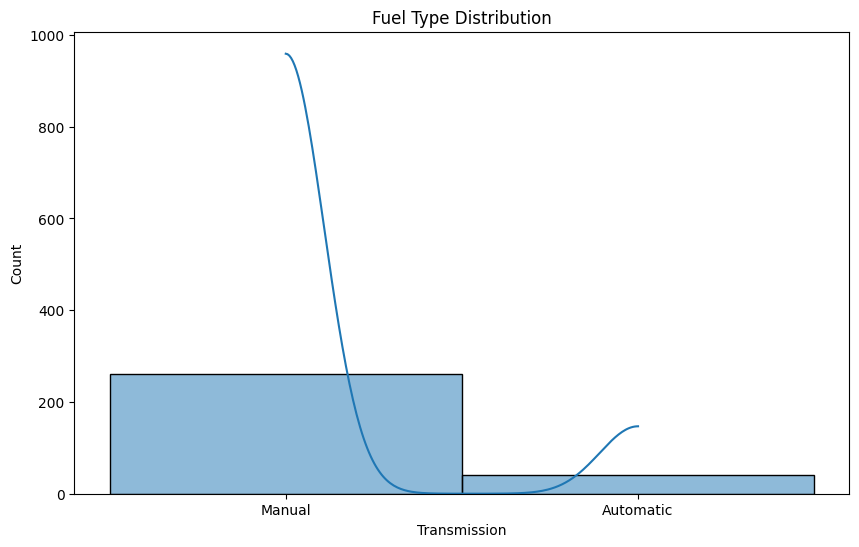

In [24]:
# Visualize the distribution of the 'fueltype' column using a histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Transmission", bins=20, kde=True)
plt.title("Fuel Type Distribution")
plt.show()

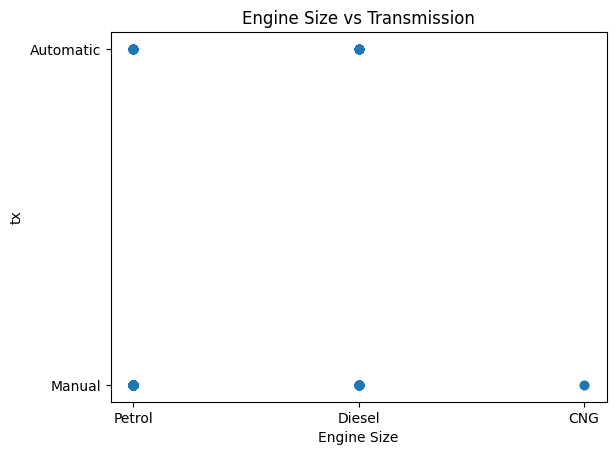

In [26]:
# Create a scatter plot of 'enginesize' vs. 'horsepower'

plt.scatter(df['Fuel_Type'], df['Transmission'])
plt.xlabel('Engine Size')
plt.ylabel('tx')
plt.title('Engine Size vs Transmission')
plt.show()

In [133]:
# Split the dataset into training and testing sets

X = df.drop(['Selling_type'], axis=1)
y = df['Selling_type']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [134]:
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object','category']).columns.tolist()


In [135]:
# Create a Linear Regression model
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features,),
        ('num', StandardScaler(), numeric_features)
    ])


from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(x_train, y_train)  # y_train should contain class labels like 'Dealer', 'Individual'



model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Transmission']),
                                                 ('num', StandardScaler(),
                                                  ['Year', 'Selling_Price',
                                                   'Present_Price',
                                                   'Driven_kms', 'Owner'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [136]:
# Make predictions on the test set

y_pred = model.predict(x_test)

In [138]:
# Calculate Mean Squared Error and R-squared for evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

      Dealer       1.00      1.00      1.00        35
  Individual       1.00      1.00      1.00        26

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [141]:
new_car_features = pd.DataFrame([{
    'Car_Name': 'ritz',
    'Year': 2018,
    'Selling_Price':4.00,
    'Present_Price': 5.5,
    'Driven_kms': 40000,
    'Fuel_Type': 'Petrol',
    'Transmission': 'Manual',
    'Owner': 0
}])
new_car_features = new_car_features[X.columns]  # Ensure same order

In [144]:

# Predict
predicted_selling_type = model.predict(new_car_features)
print("Predicted Selling Type:", predicted_selling_type[0])
import joblib

# Save the model to a file
joblib_file = "car_price_model.pkl"
joblib.dump(model, joblib_file)

print(f"Model saved to {joblib_file}")


Predicted Selling Type: Dealer
Model saved to car_price_model.pkl
